# Práctico TP4 (Histograma de Luminancias)
Para este TP se desea que implementen lo siguiente:
* Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). 
* Mostrar el histograma respectivo para 5 valores de contadores diferentes.
* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
* Implementar las funciones: 
  * Lineal a trozos para un valor Y_min y Y_max como parámetros de la función
  * Raíz cuadrada 
  * Potencia cuadrática. 
  
Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.
NO OLVIDEN TENER EN CUENTA LOS RANGOS DE CADA ESPACIO DE COLOR RGB Y YIQ.
### Fecha de entrega: 08 de Octubre

## Alumno: Leandro Borgnino

### 1.1 Imports

In [ ]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from skimage.transform import resize

### 1.2 Funciones generales desarrolladas en TP3

In [ ]:

# Descargar, leer, normalizar la imagen.
def get_and_read_img (url, name=''):
  img = io.imread(url)
  img = img/255.
  img = resize(img,(600,600))
  return img

# Mostrar Imagen
def show_img (img, size = (8,8)):
  plt.figure(figsize = size)
  plt.imshow(img)
  plt.show()

def show2_img (img1, img2, size = (8,8)):
  f, axarr = plt.subplots(1,2,figsize=size)
  axarr[0].imshow(img1)
  axarr[1].imshow(img2)
  plt.show()

# RGB a YIQ
def rgb2yiq (img):
  RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                               [ 0.595716, -0.274453, -0.321263], 
                               [ 0.211456, -0.522591, 0.311135]])
  
  im_yiq =  np.copy(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
        im_yiq[i][j] = RGB_2_YIQ_MATRIX.dot(img[i][j])

  im_yiq[:,:,0] = np.clip(im_yiq[:,:,0],0,1)
  im_yiq[:,:,1] = np.clip(im_yiq[:,:,1],-0.5957, 0.5957)
  im_yiq[:,:,2] = np.clip(im_yiq[:,:,2],-0.5226, 0.5226)

  return im_yiq

# YIQ a RGB
def yiq2rgb (img):
  YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                              [1, -0.2721, -0.6474], 
                              [1, -1.1070, 1.7046]])
  im_rgb =  np.copy(img)
  for i in range(len(img)):
    for j in range(len(img[0])):
        im_rgb[i][j] = np.clip(YIQ_2_RGB_MATRIX.dot(img[i][j]),0,1)

  return im_rgb

def suma_clamp_rgb (image1, image2):
  image3 = image1 + image2
  image3 = np.clip(image3, 0, 1)
  return image3

def resta_clamp_rgb (image1, image2):
  image3 = image1 - image2
  image3 = np.clip(image3, 0, 1)
  return image3

def suma_avg_rgb (image1, image2):
  image3 = (image1 + image2)/2.
  image3 = np.clip(image3, 0., 1.)
  return image3

def resta_avg_rgb (image1, image2):
  image3 = (image1 - image2)/2.
  image3 = np.clip(image3, 0., 1.)
  return image3

def suma_clamp_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = Y1 + Y2
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 + Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def resta_clamp_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = Y1 - Y2
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def suma_avg_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = (Y1 + Y2)/2.
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 + Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 + Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_clamp = np.dstack((Y_new, I_new, Q_new))
  return yiq_clamp

def resta_avg_yiq (image1, image2):
  image1_yiq = rgb2yiq(image1)
  image2_yiq = rgb2yiq(image2)

  Y1, I1, Q1 = image1_yiq[:,:,0], image1_yiq[:,:,1], image1_yiq[:,:,2]
  Y2, I2, Q2 = image2_yiq[:,:,0], image2_yiq[:,:,1], image2_yiq[:,:,2]

  Y_new = (Y1 - Y2)/2.
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = (Y1*I1 - Y2*I2)/(Y1+Y2)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = (Y1*Q1 - Y2*Q2)/(Y1+Y2) 
  Q_new = np.clip(Q_new, -0.5226, 0.5226)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

def yiq_if_ligther (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] >= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]

  
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_lighter = np.dstack((Y_new, I_new, Q_new))

  return yiq_lighter

def yiq_if_darker (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros_like(Y1)
  I_new = np.zeros_like(I1)
  Q_new = np.zeros_like(Q1)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] <= Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      else:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]
  
  Y_new = np.clip(Y_new, 0., 1.)
  I_new = np.clip(I_new, -0.5957, 0.5957)
  Q_new = np.clip(Q_new, -0.5226, 0.5226)
  yiq_darker = np.dstack((Y_new, I_new, Q_new))

  return yiq_darker

def yiq_clip(image_yiq):
  Y = np.clip(image_yiq[:,:,0], 0, 1)
  I = np.clip(image_yiq[:,:,1], -0.5957, 0.5957)
  Q = np.clip(image_yiq[:,:,2], -0.5226, 0.5226)
  return np.dstack((Y, I, Q))

def rgb_clip(image_rgb):
  R = np.clip(image_rgb[:,:,0], 0, 1)
  G = np.clip(image_rgb[:,:,1], 0, 1)
  B = np.clip(image_rgb[:,:,2], 0, 1)

  R = (R*255).astype(int)
  G = (G*255).astype(int)
  B = (B*255).astype(int)    
  return np.dstack((R, G, B))

### 1.3 Funciones de Histograma

In [ ]:
def hist_lum_bins(image_yiq, bines):
  intervalos = bines
  paso = 1./intervalos
  freq_array = [0.]*intervalos
  luminancias = image_yiq[:,:,0]
  for i in range(len(luminancias)):
    for j in range(len(luminancias[0])):
      for k in range(intervalos):
        if (k != (intervalos-1) ):
          if (k*paso <= luminancias[i][j] < (k+1)*paso ):
            freq_array[k] += 1  
        else:
          if (k*paso <= luminancias[i][j] <= (k+1)*paso ):
            freq_array[k] += 1  

    return freq_array, paso

def plot_histo(histo,paso,image1, title= "Original"):
  fig, axs = plt.subplots(1,2,figsize=(25,8))
  
  plt.subplot(1,2,1)
  plt.imshow(image1)

  plt.title("Imagen "+title)
  plt.xlabel("x")
  plt.ylabel("y")

  bins = []
  for i in range(len(histo)):
    bins.append(paso*(i+1))

  plt.subplot(1,2,2)

  plt.bar(bins, histo, width=bins[1]-bins[0], color='cornflowerblue', ec='black')
  plt.title("Histograma de Luminancias")
  plt.xlabel("Luminancias")
  plt.ylabel("Ocurrencias")

  plt.tight_layout()
  plt.show()


### 1.4 Funciones de Filtrado

In [ ]:
def pow_filter(image):
  Y, I, Q = image[:,:,0],image[:,:,1],image[:,:,2]
  Y_new = Y * Y
  YIQ_new = np.dstack((Y_new,I,Q))
  return YIQ_new

def sqrt_filter(image):
  Y, I, Q = image[:,:,0],image[:,:,1],image[:,:,2]
  Y_new = Y ** 0.5
  YIQ_new = np.dstack((Y_new,I,Q))
  return YIQ_new

def lineal_interval_filter(image, y_lim_low, y_lim_max):
  # Rango imagen entrada
  y_out_min = 0
  y_out_max = 1

  # Recta que queda entre los limites
  m = (y_out_max - y_out_min)/(y_lim_max - y_lim_low)
  b = y_out_min - m * y_lim_low
  
  Y, I, Q = image[:,:,0],image[:,:,1],image[:,:,2]

  Y[Y < y_lim_low] = 0
  Y[Y > y_lim_max] = 1
  Y = np.where((Y >= y_lim_low) & (Y <= y_lim_max), m * Y + b, Y)

  image_yiq_mod = np.dstack((Y, I, Q))
  return image_yiq_mod

### 1.4 Lectura de Imágenes

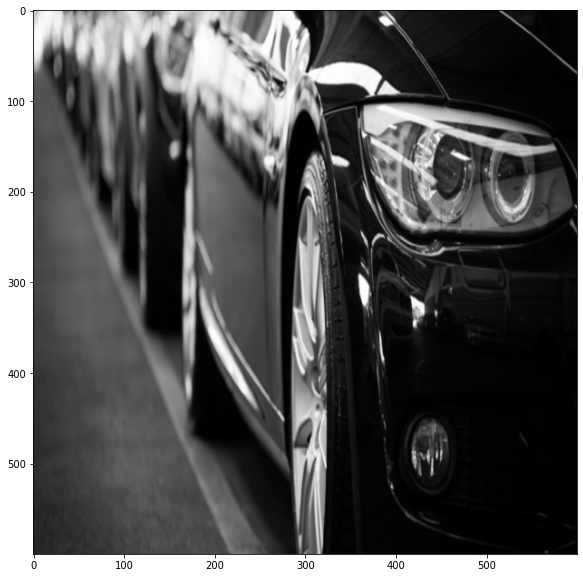

In [ ]:
#@title Imágenes de Entrada: { run: "auto" }
dict_urls = {'Auto':'https://www.recambiooriginal.com/wp-content/uploads/2018/11/pintura_negra_coche_ventajas_inconvenientes_3-800x400.jpg',
             'Edificio':'https://s3-sa-east-1.amazonaws.com/modernabuenosaires/img/obras/galeria/888_1506021627.jpg',
             'Muralla':'https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/The_Great_Wall_of_China_at_Jinshanling-edit.jpg/1200px-The_Great_Wall_of_China_at_Jinshanling-edit.jpg',
             'Eiffel':'https://www.toureiffel.paris/sites/default/files/actualite/image_principale/vue_depuisjardins_webbanner.jpg'
            }

Imagen1 = 'Auto' #@param ["Auto","Edificio","Muralla","Eiffel"]

image1 = get_and_read_img(dict_urls[Imagen1])
show_img(image1,(10,10))


### 1.5 Histograma con parámetro de bines

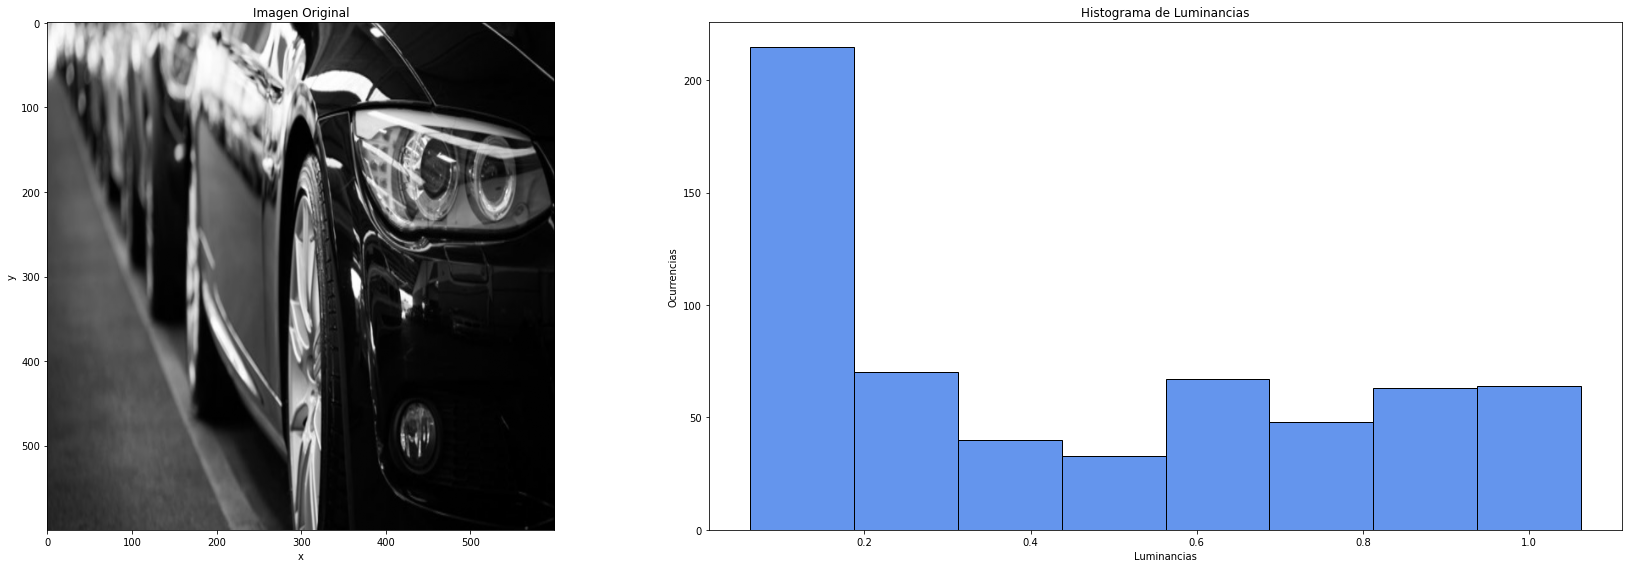

In [ ]:
#@title Cantidad de bines del histograma: { run: "auto" }

BINES = 8 #@param {type:"slider", min:1, max:30, step:1}

image_proc = rgb2yiq(image1)

histo, paso = hist_lum_bins(image_proc, BINES)
plot_histo(histo,paso,image1)


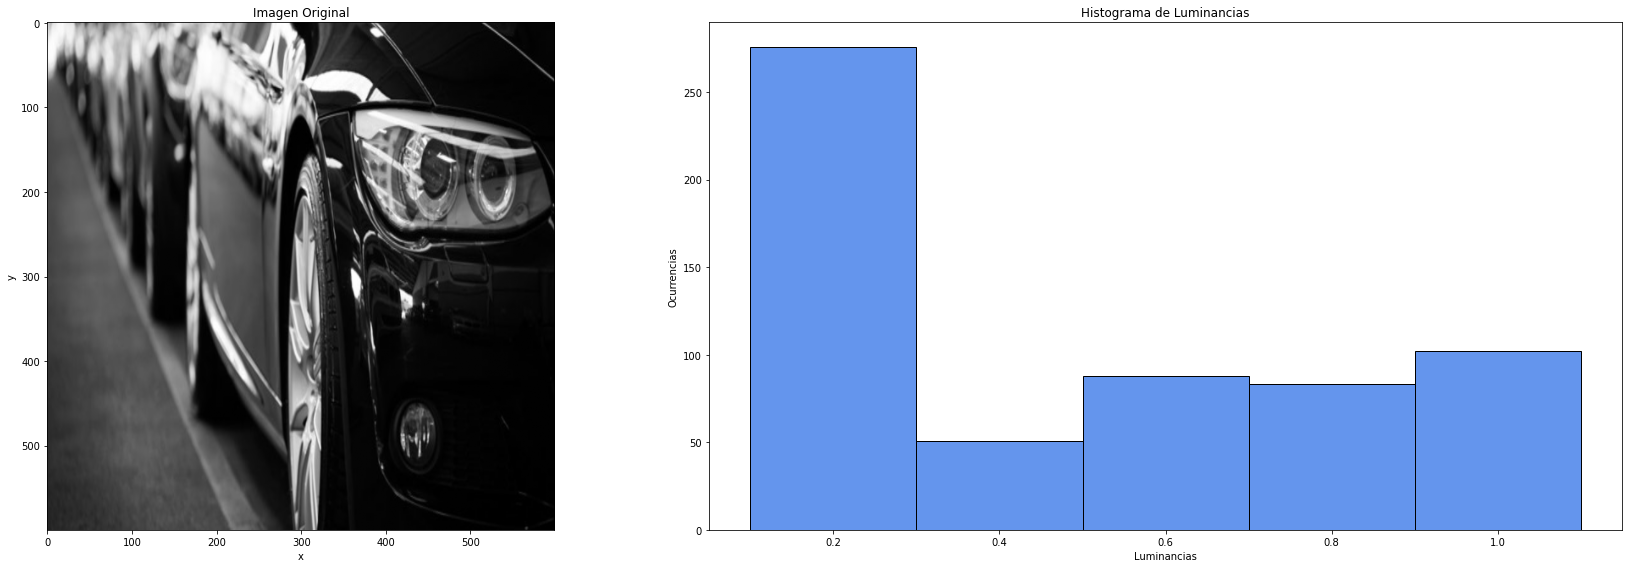

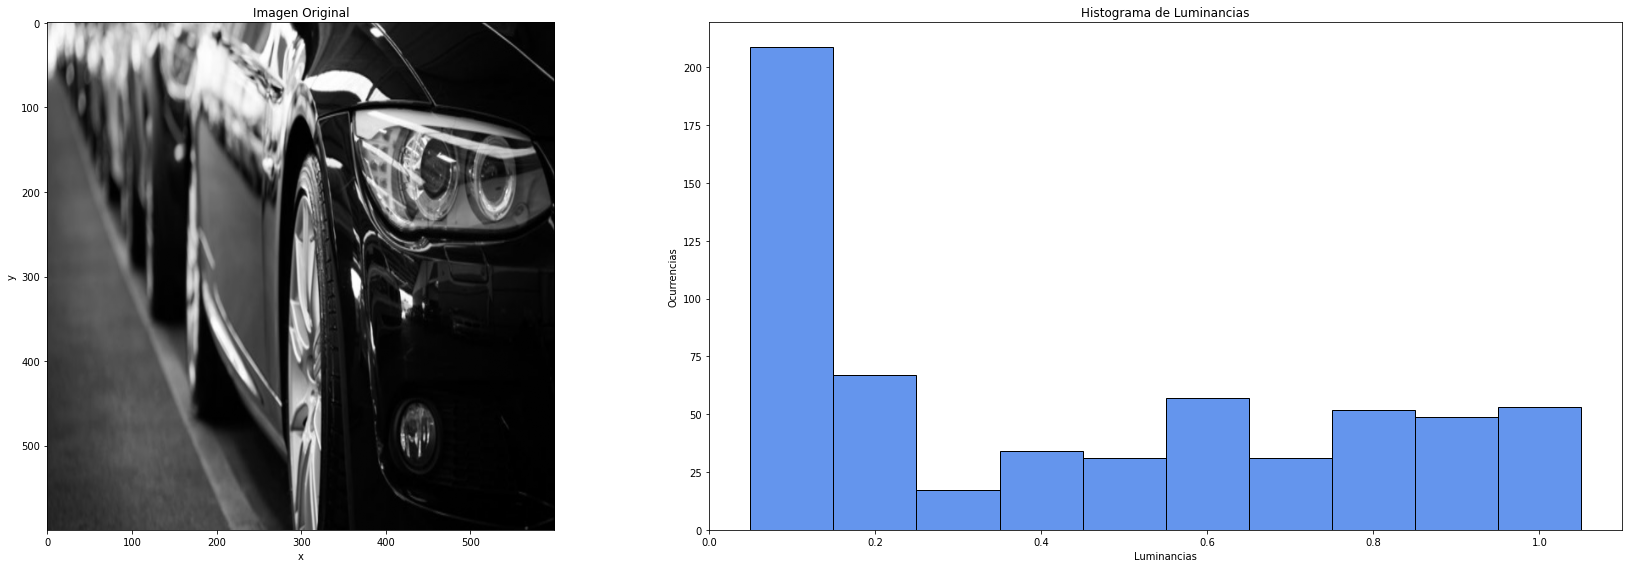

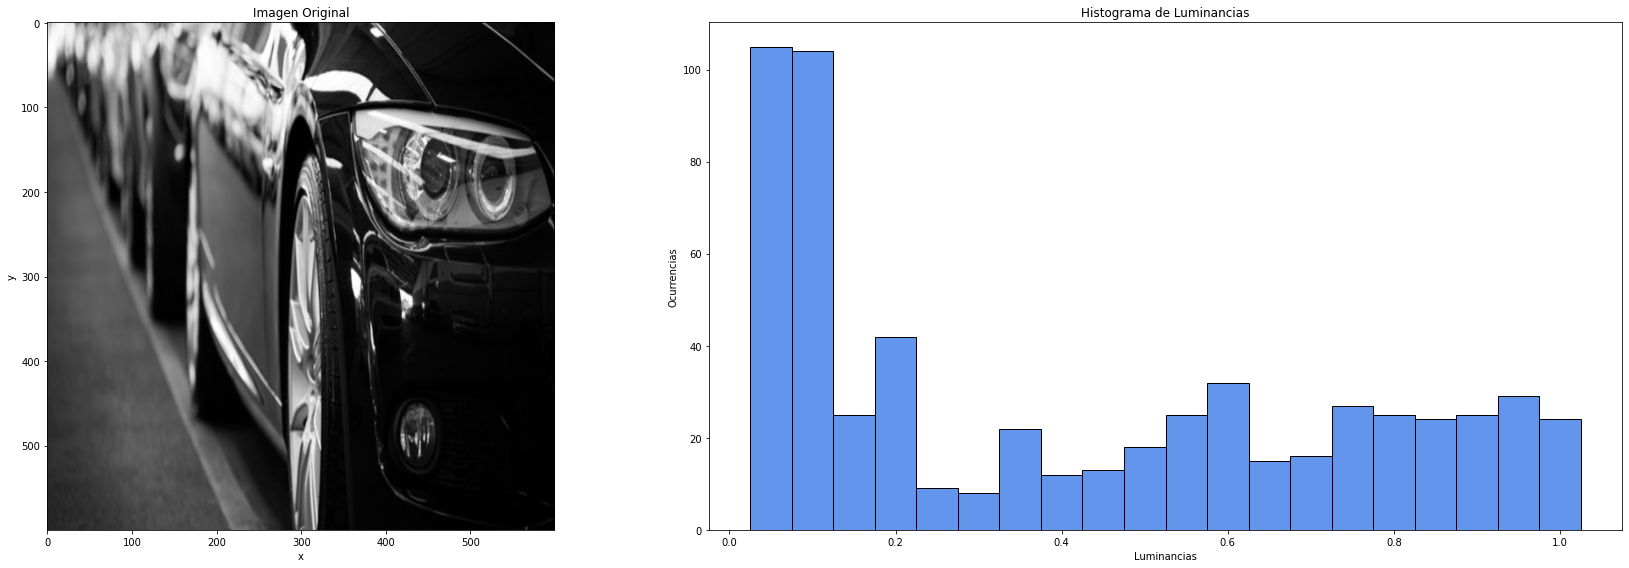

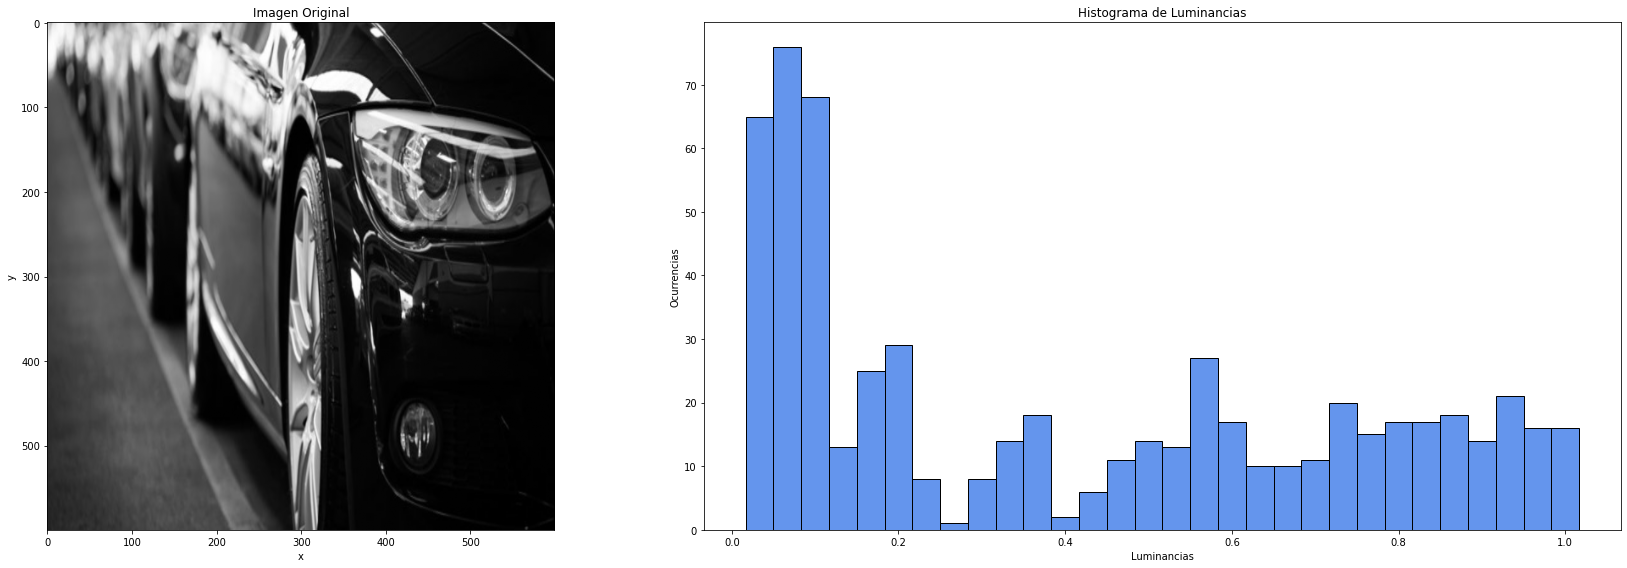

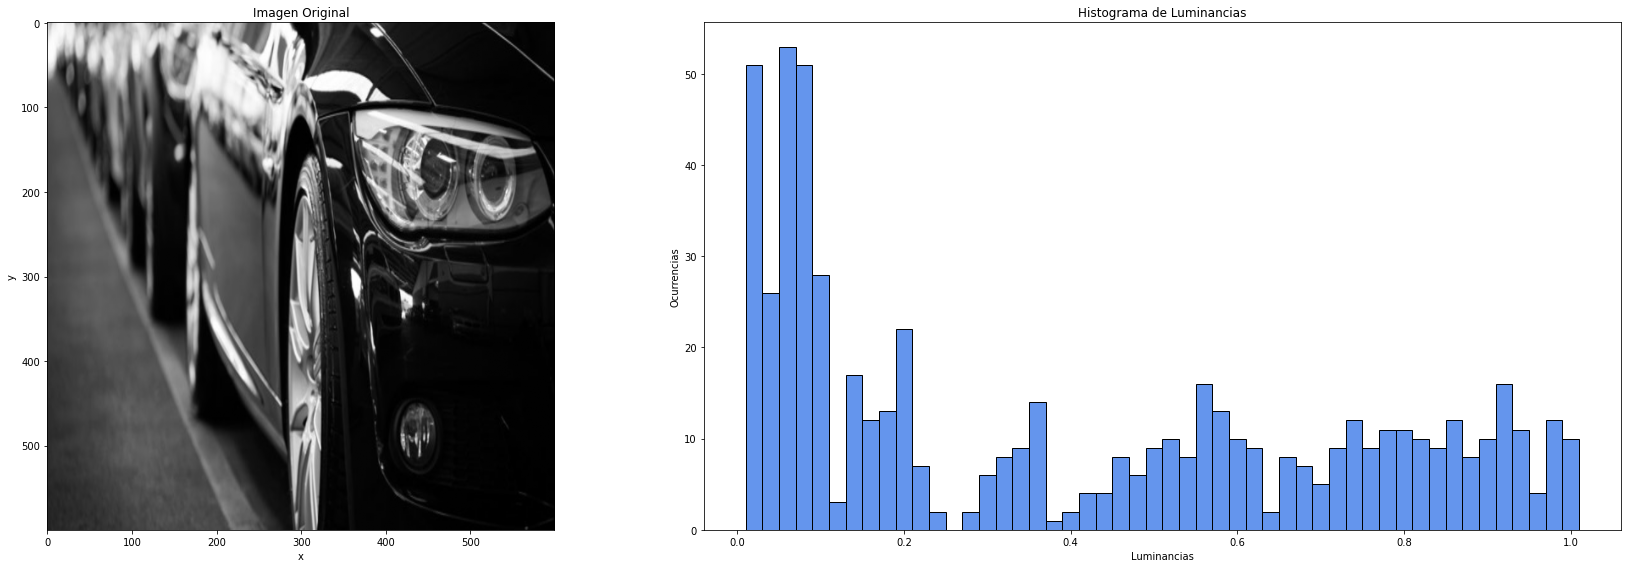

In [ ]:
bines_array = [5,10,20,30,50]

for i in bines_array:
  histo, paso = hist_lum_bins(image_proc, i)
  plot_histo(histo,paso,image1)


# 2. Filtros Espaciales

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


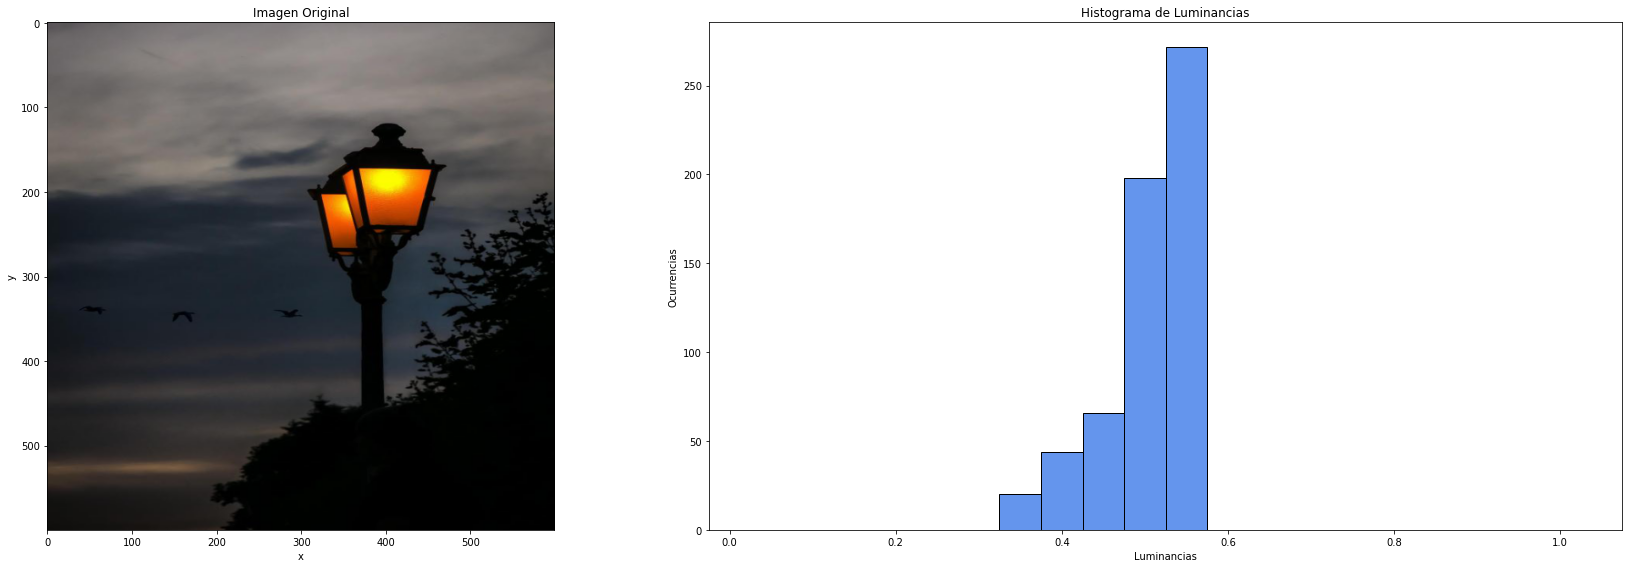

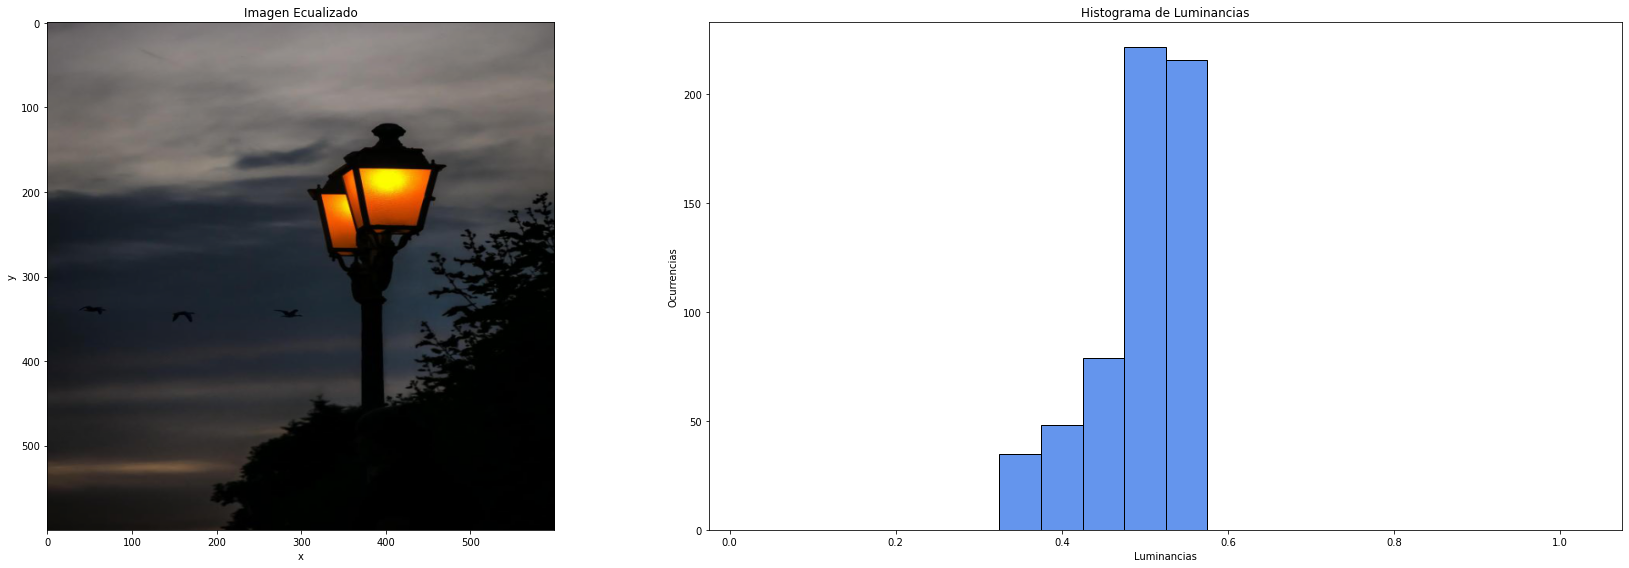

In [ ]:
#@title Configuración Filtros: { run: "auto" }
#@markdown Imagen de Entrada: { run: "auto" }
dict_urls = {'Baja_Luminancia':'https://www.watfordobserver.co.uk/resources/images/9989374.jpg?display=1&htype=0&type=responsive-gallery',
             'Alta_Luminancia':'https://images.unsplash.com/photo-1541119638723-c51cbe2262aa?ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8YnJpZ2h0JTIwZGF5fGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&w=1000&q=80'
            }

Imagen1 = 'Baja_Luminancia' #@param ["Baja_Luminancia","Alta_Luminancia"]

image1 = get_and_read_img(dict_urls[Imagen1])

#@markdown Cantidad de bines Histograma: { run: "auto" }
BINES = 20 #@param {type:"slider", min:1, max:50, step:1}

#@markdown Filtro a Aplicar: { run: "auto" }
Filtro = 'Lineal_a_Trozos' #@param ["Multiplicacion_alfa", "Potencia_cuadratica", "Raiz_cuadrada","Lineal_a_Trozos"]

#@markdown Coeficiente de multiplicación: { run: "auto" }
Coeff_alpha = 2.9 #@param {type:"slider", min:0, max:5, step:0.1}

#@markdown Límite superior e inferior de la función lineal a trozos: { run: "auto" }
lim_inf = 0 #@param {type:"slider", min:0, max:1, step:0.1}
lim_sup = 1 #@param {type:"slider", min:0, max:1, step:0.1}

image_yiq = yiq_clip(rgb2yiq(image1))
histo, paso = hist_lum_bins(image1, BINES)
plot_histo(histo,paso,image1)

if Filtro == 'Multiplicacion_alfa':
  lumin = image_yiq[:,:,0] * Coeff_alpha
  yiq_multip = np.dstack((lumin, image_yiq[:,:,1], image_yiq[:,:,2]))
  yiq_multip = yiq_clip(yiq_multip)
  histo, paso = hist_lum_bins(yiq_multip, BINES)
  rgb_multip = yiq2rgb (yiq_multip)
  plot_histo(histo,paso,rgb_multip, title= "Ecualizado")
elif Filtro == 'Potencia_cuadratica':
  yiq_filtered = pow_filter(image_yiq)
  yiq_filtered = yiq_clip(yiq_filtered)
  rgb_multip = yiq2rgb (yiq_filtered)
  histo, paso = hist_lum_bins(yiq_filtered, BINES)
  plot_histo(histo,paso,rgb_multip, title= "Ecualizado")  
elif Filtro == 'Raiz_cuadrada':
  yiq_filtered = sqrt_filter(image_yiq)
  yiq_filtered = yiq_clip(yiq_filtered)
  rgb_multip = yiq2rgb (yiq_filtered)
  histo, paso = hist_lum_bins(yiq_filtered, BINES)
  plot_histo(histo,paso,rgb_multip, title= "Ecualizado")  
elif Filtro == 'Lineal_a_Trozos':
  yiq_filtered = lineal_interval_filter(image_yiq, lim_inf, lim_sup)
  yiq_filtered = yiq_clip(yiq_filtered)
  rgb_multip = yiq2rgb (yiq_filtered)
  histo, paso = hist_lum_bins(yiq_filtered, BINES)
  plot_histo(histo,paso,rgb_multip, title= "Ecualizado")  
else:
  print("Error")



## 2.2 Filtrado con todos los filtros en las dos imágenes


#### Imagen con baja iluminación

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


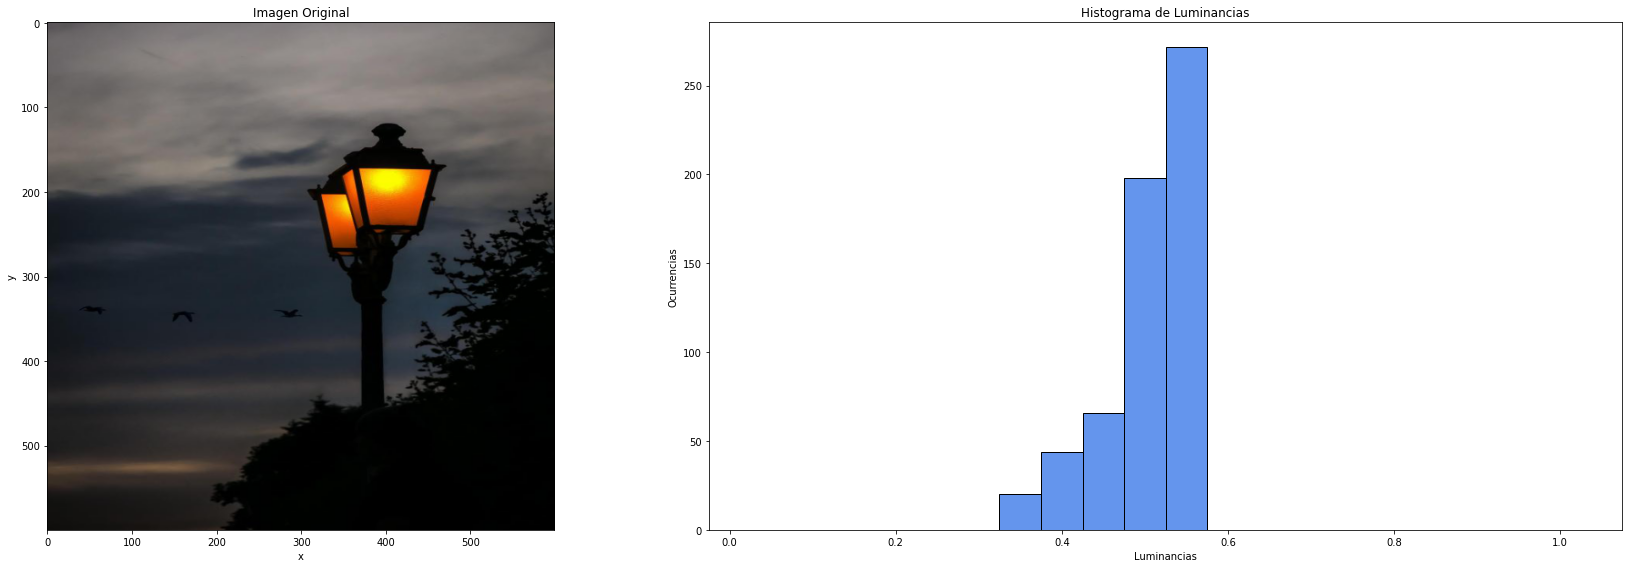

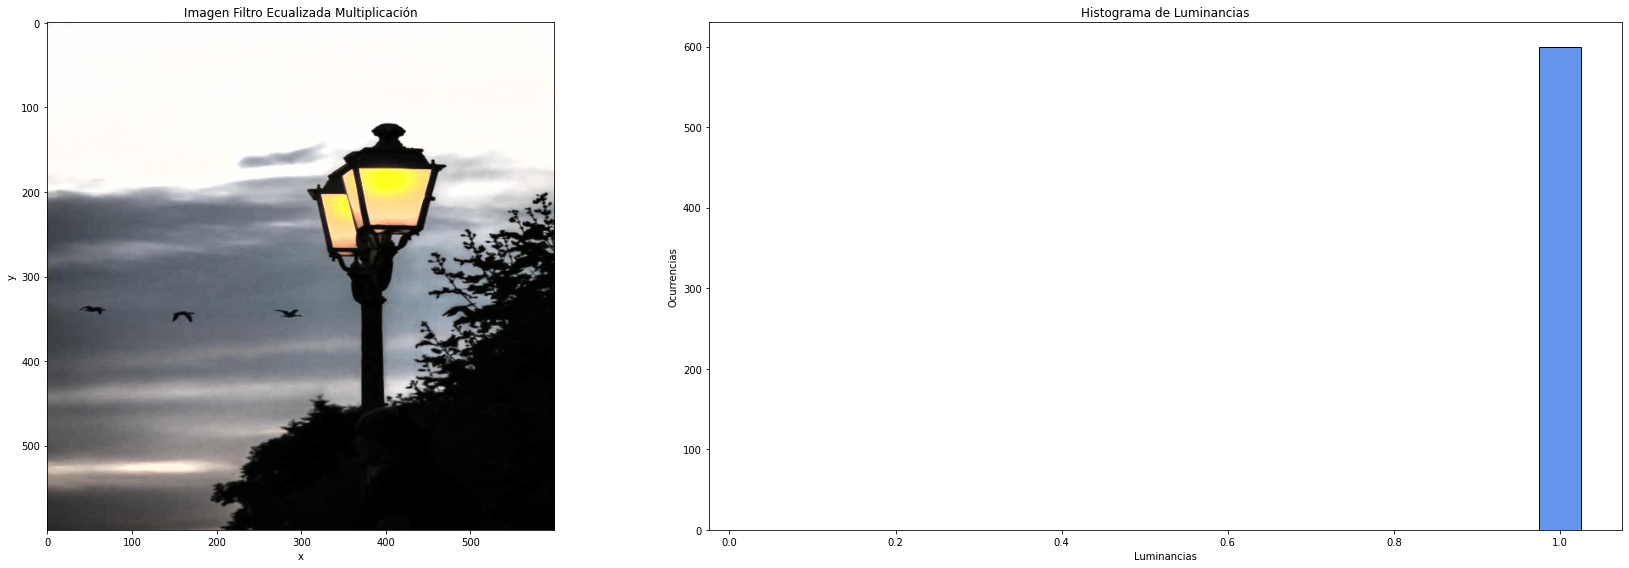

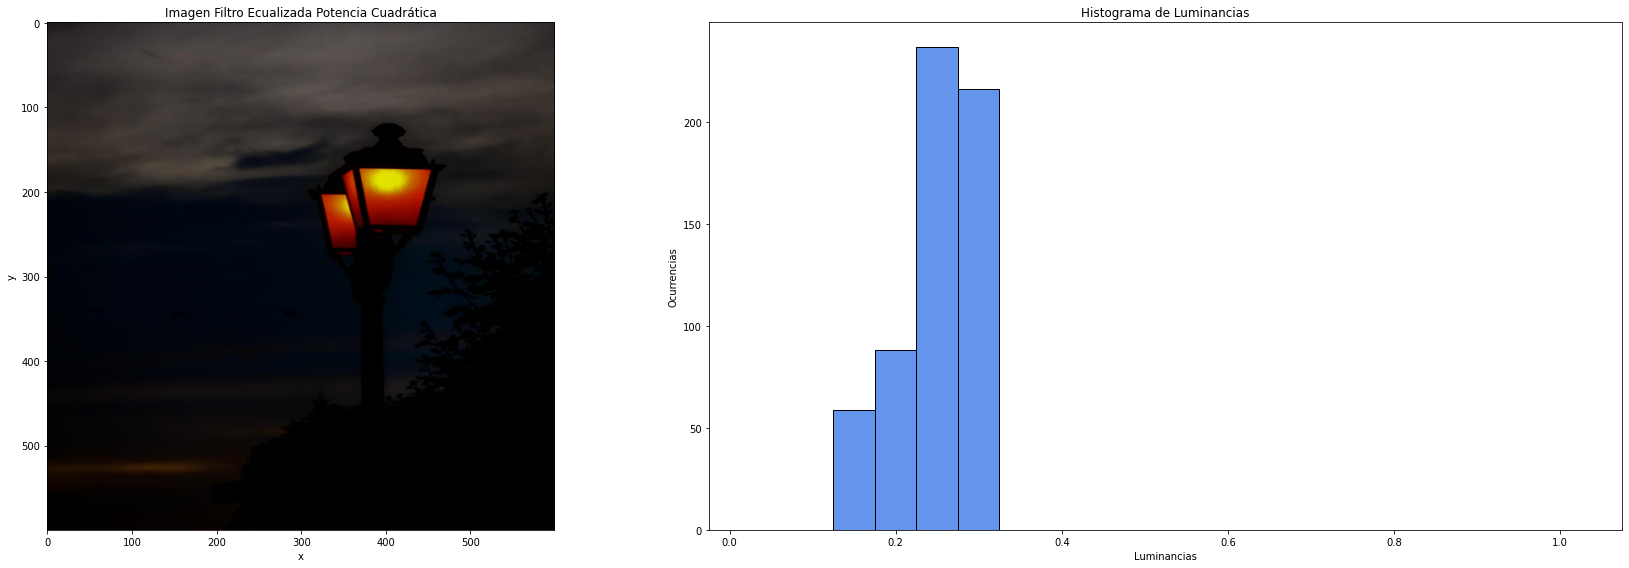

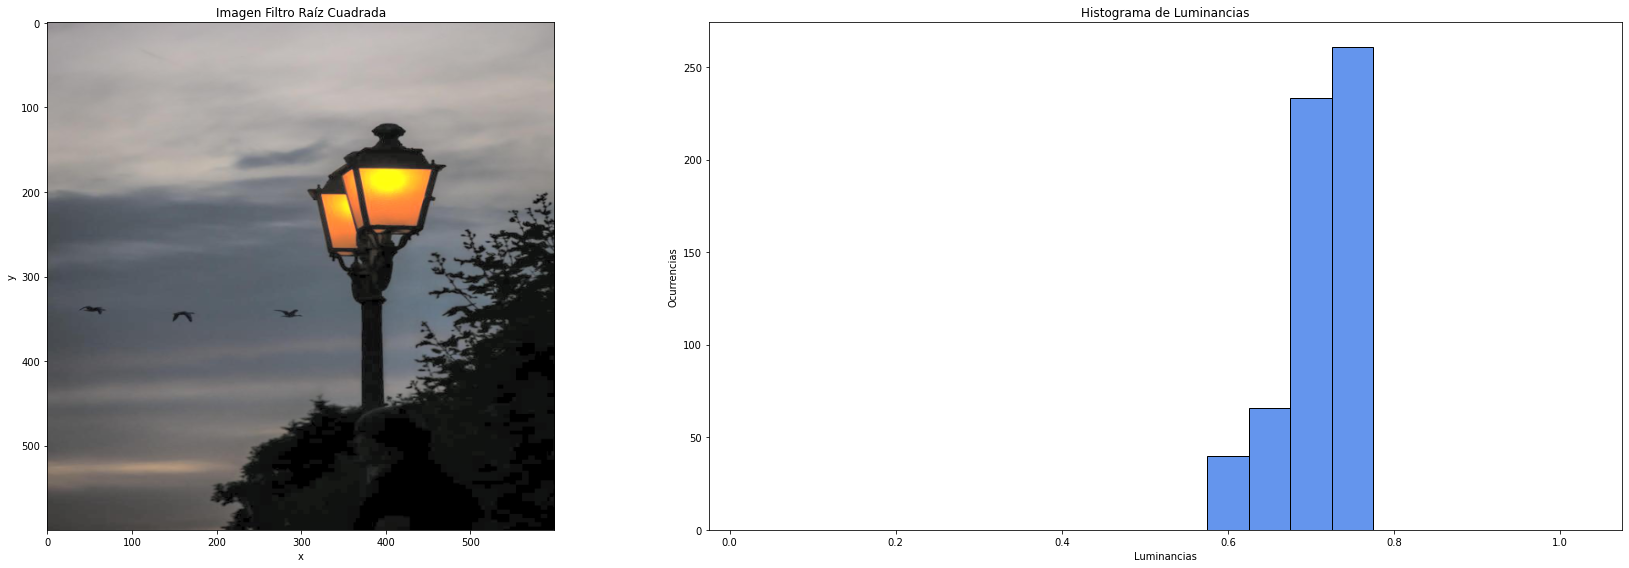

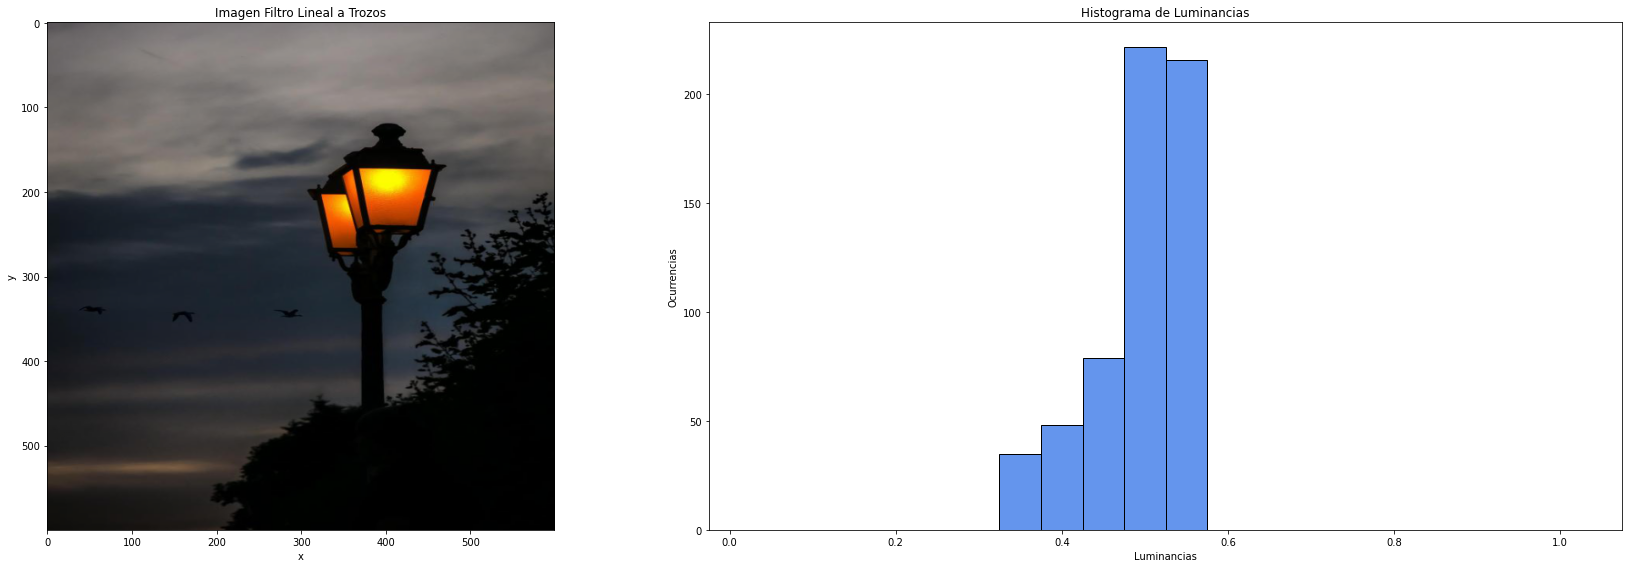

In [ ]:
image1 = get_and_read_img(dict_urls['Baja_Luminancia'])
image_yiq = yiq_clip(rgb2yiq(image1))
histo, paso = hist_lum_bins(image1, BINES)
plot_histo(histo,paso,image1)

lumin = image_yiq[:,:,0] * Coeff_alpha
yiq_multip = np.dstack((lumin, image_yiq[:,:,1], image_yiq[:,:,2]))
yiq_multip = yiq_clip(yiq_multip)
histo, paso = hist_lum_bins(yiq_multip, BINES)
rgb_multip = yiq2rgb (yiq_multip)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Multiplicación")
yiq_filtered = pow_filter(image_yiq)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Potencia Cuadrática")  
yiq_filtered = sqrt_filter(image_yiq)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Raíz Cuadrada")  
yiq_filtered = lineal_interval_filter(image_yiq, lim_inf, lim_sup)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Lineal a Trozos")  

### Imagen Iluminada

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


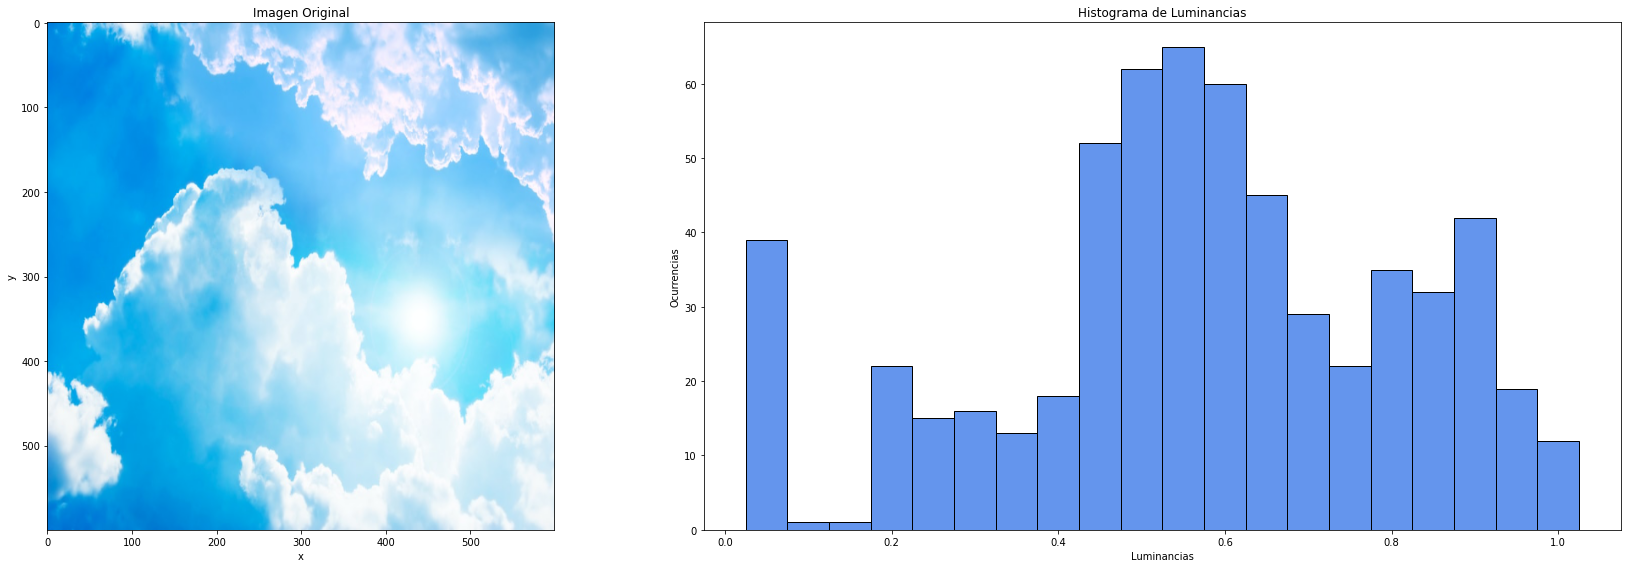

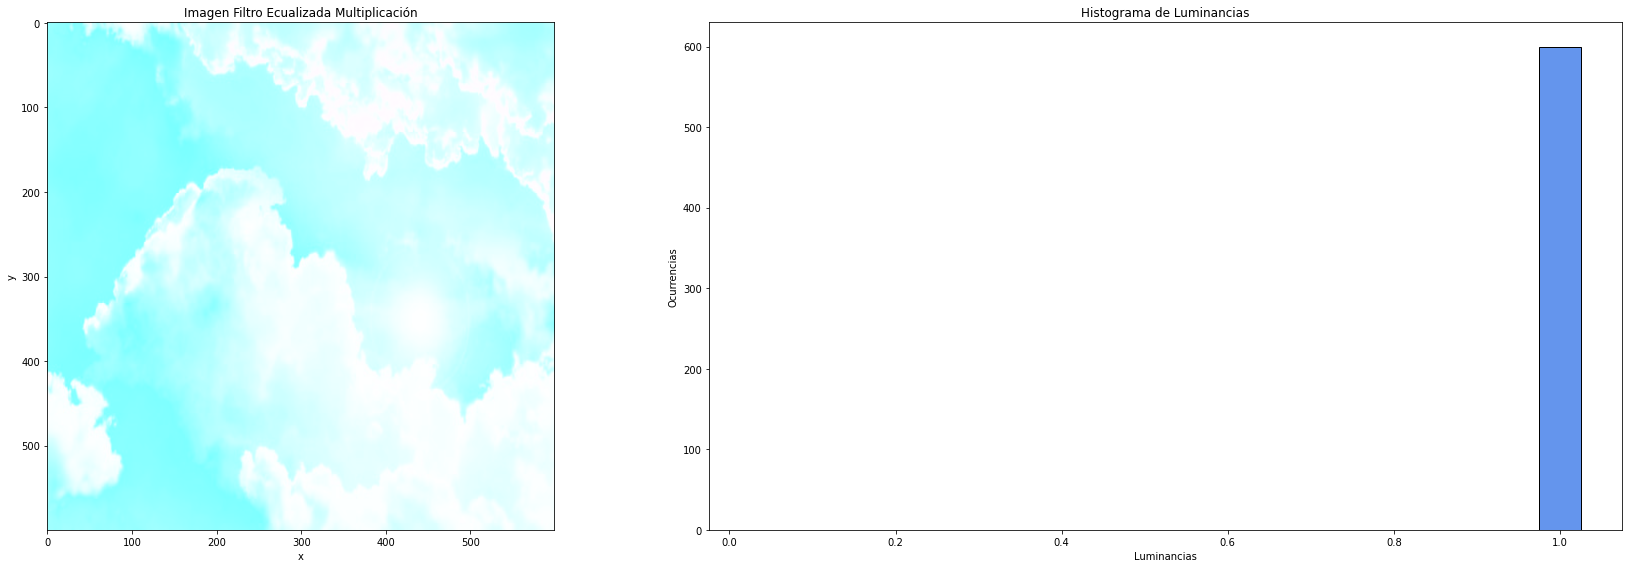

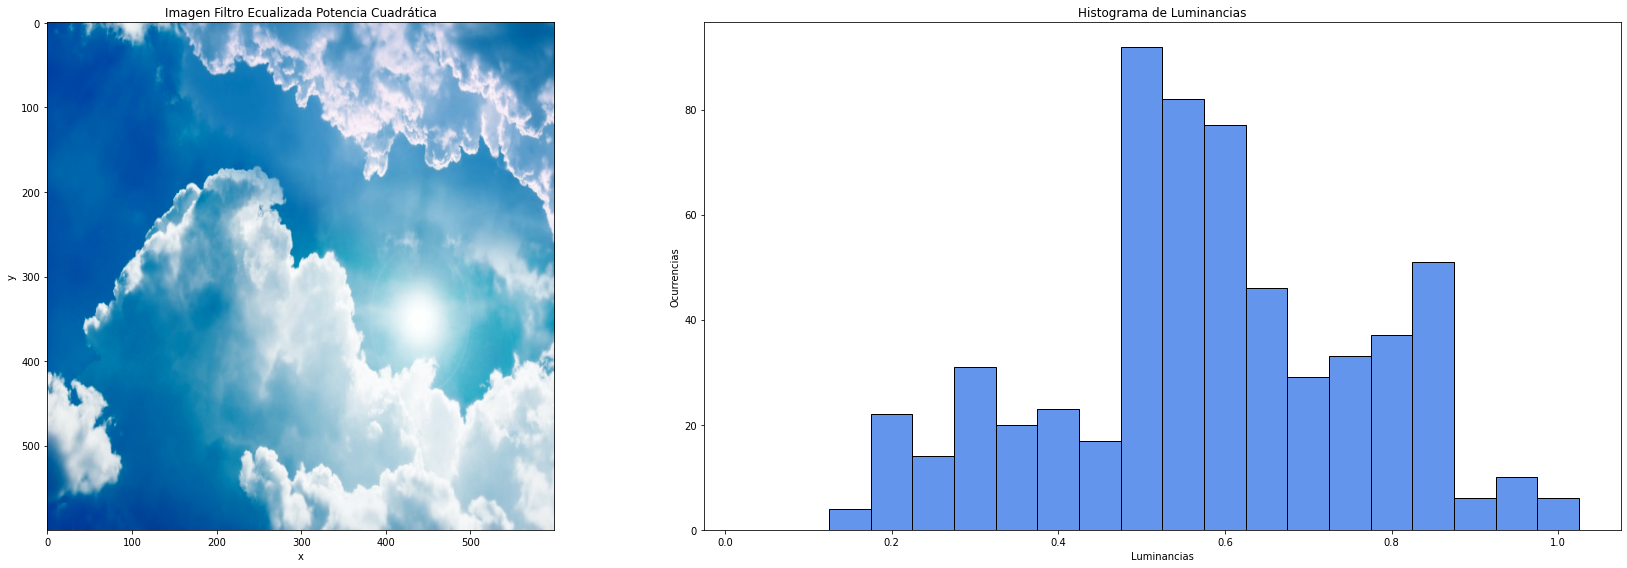

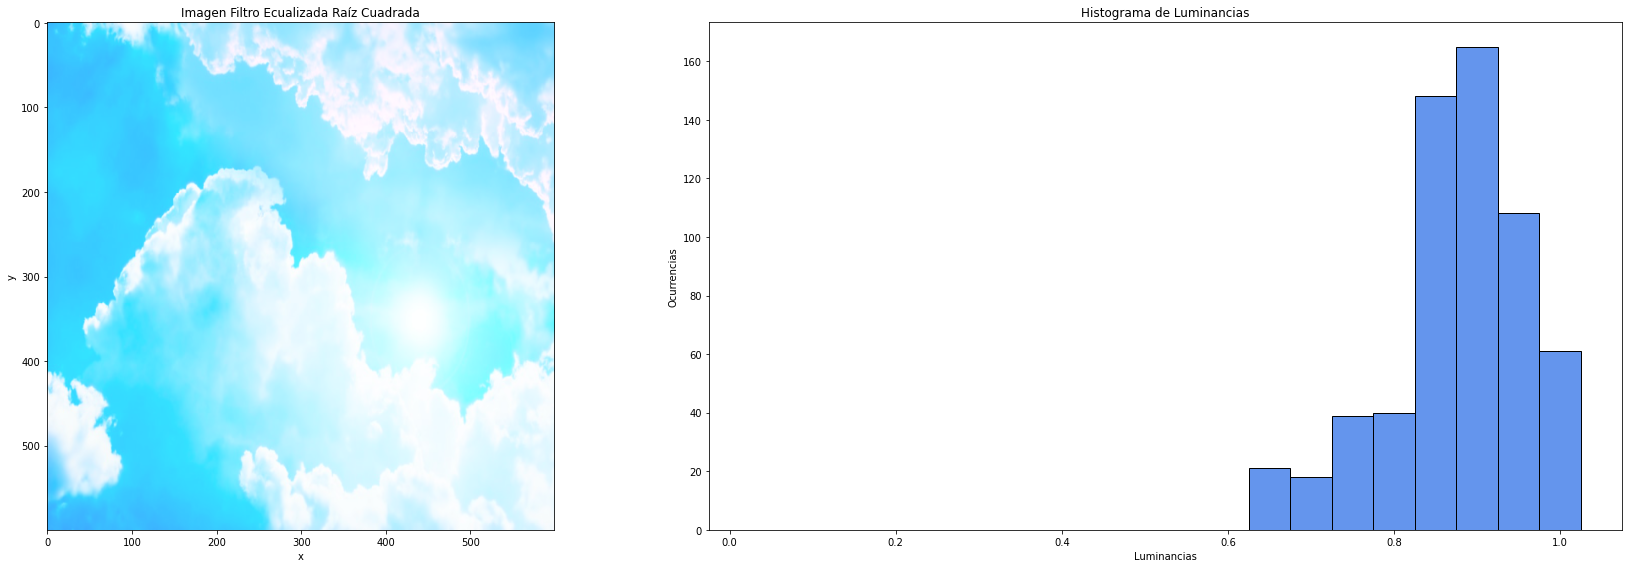

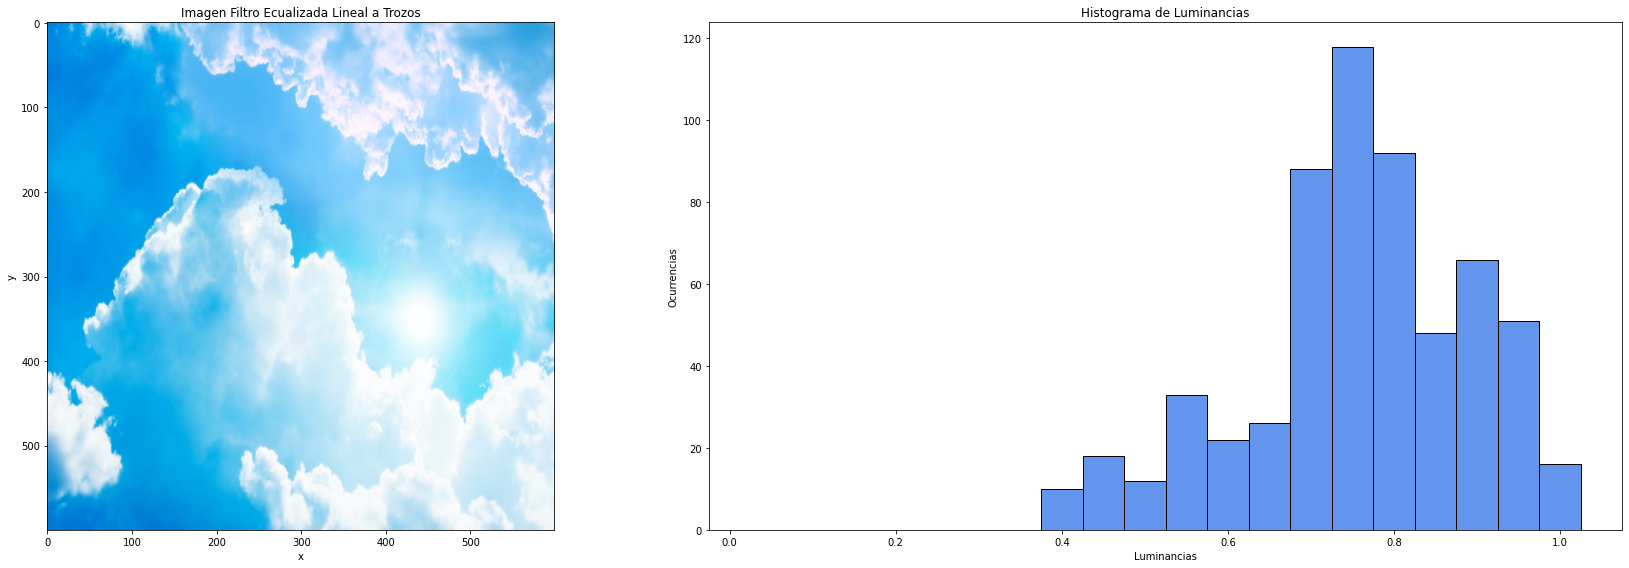

In [ ]:

image1 = get_and_read_img(dict_urls['Alta_Luminancia'])
image_yiq = yiq_clip(rgb2yiq(image1))
histo, paso = hist_lum_bins(image1, BINES)
plot_histo(histo,paso,image1)

lumin = image_yiq[:,:,0] * Coeff_alpha
yiq_multip = np.dstack((lumin, image_yiq[:,:,1], image_yiq[:,:,2]))
yiq_multip = yiq_clip(yiq_multip)
histo, paso = hist_lum_bins(yiq_multip, BINES)
rgb_multip = yiq2rgb (yiq_multip)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Multiplicación")
yiq_filtered = pow_filter(image_yiq)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Potencia Cuadrática")  
yiq_filtered = sqrt_filter(image_yiq)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Raíz Cuadrada")  
yiq_filtered = lineal_interval_filter(image_yiq, lim_inf, lim_sup)
yiq_filtered = yiq_clip(yiq_filtered)
rgb_multip = yiq2rgb (yiq_filtered)
histo, paso = hist_lum_bins(yiq_filtered, BINES)
plot_histo(histo,paso,rgb_multip, title= "Filtro Ecualizada Lineal a Trozos")  

## 3. Conclusiones

* Multiplicación Alfa: En las dos imágenes provoca efectos indeseados. En la de alta luminancia, si aplicamos un alfa menos a 1 obtenemos efectivamente una disminución general de las mismas, pero saturan muchas luminancias hacia abajo ya que su aplicación es lineal. Lo mismo pasa con la imagen de luminancia alta, se nota como quema algunos sectores, perdiéndose así información al saturar la luminancia en 1.

* Función de potencia cuadrática: En el caso de la potencia cuadrática, para la imagen con baja luminancia empeora el histograma, ya que tiene valores bajos menores a uno que si los multiplicamos por sí mismos da un valor más bajo aún. Esto provoca que la imagen ya oscura, se vuelva más oscura. En el caso de la imagen con alta luminancia se ven mejores resultados ya que disminuye las luminancias en un factor cuadrático.

* Función Raíz Cuadrada: En el caso de la función cuadrada, tenemos un comportamiento contrario al de la potencia cuadrática. Los valores de luminancia bajos tienen mayor pendiente lo que hace que el histograma se acomode mejor para ese sector. En el caso de las luminancias altas tenemos el efecto contrario, lo que hace que la imagen tenga sectores quemados.

* Función lineal a trozos: En este caso, las luminancias en el centro del histograma se escalan linealmente mejorando el contraste. En los sectores de baja luminancia si establecemos los límites de manera correcta no se modifican.

* En general se pudo observar que para imágenes con luminancias bajas, el filtro de raíz cuadrada funciona mejor, aumentando las luminancias general de la imagen y su contraste.En el caos de las imágenes con luminancias altas, el filtro de potencia cuadrática funcionaría como complemento de la raíz cuadrada, disminuyendo las luminancias en general y aumentando el contraste. Las dos funciones son no lineales, lo que en este caso es una ventaja pero puede traer problemas a la hora de operar. En el caso de luminancias con valores medios, la función lineal a trozos funciona de mejor manera ya que podemos definir los límites y tratar las luminancias medias con mayor precisión.